[*********************100%***********************]  6 of 6 completed


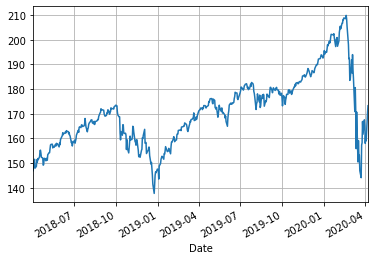

In [46]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 18 20:17:53 2020

@author: robert_normand
"""

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Download Data from Yahoo Finance
import datetime
import matplotlib.pyplot as plt
import pandas as pd
# Pour lire les données de Yahoo Finance, vous devez installer le toolbox yfinance
import yfinance as yf 

start_sp = datetime.datetime(2018,3,31)
end_sp = datetime.datetime(2020, 12,31)

# Use Vanguard ETF
# SP500 Index + 11 Industry

BLack_ETF=['IVV','IWF','IJH','IJR','IWM','IVW']


#BLack_ETF=['IVV','IWF','IJH','IJR','IWM','IWD','ITOT','IVW','IWB','IWR','DVY',
#           'IVE','IWP','IWS','IWV','IUSG','IWO','IWN','IBB','IJK','IUSV',
#           'OEF','IJS','IJJ','IYW','IHI','IJT','ITA','IGV','IYH','SOXX','EWC',
#           'IGM','IYF','JKE','SUSA','IDU','IYY','IYG','JKD','IYC','IYJ','JKG',
#           'IWC','IYK','JKF','JKH','IYT','JKI','IYZ','IGE','IYE','JKL','IYM',
#           'JKJ','JKK','IGN']

Data = yf.download(BLack_ETF, start=start_sp, end=end_sp,group_by="ticker")

# To access data for SP500
SP500_dat=Data['IVW']

# To access the adjusted close price, use
Data['IVW']['Adj Close']

# Graph data
Data['IVW']['Adj Close'].plot(grid=True)

# To get Information about a ticker
SP500_detail = yf.Ticker("IVW")

# Show stock info
#SP500_detail.info


In [47]:
#SP500_dat

In [48]:
#les rendements quotidiens
from pandas_datareader import data, wb
df = pd.DataFrame([data.DataReader(etf, 'yahoo', start_sp, end_sp)['Adj Close'] for etf in BLack_ETF]).T
df.columns = BLack_ETF
rendement = df.pct_change()
#rendement

In [49]:
# Mettre le rendement en 0 = descente 1= montée
j=1
for ticker in BLack_ETF:
    for j in range(len(rendement)):
        if rendement[ticker][j]<0:
            rendement[ticker][j]=0
        else:
            rendement[ticker][j]=1
rendement_bin=rendement
rendement_bin

,IVV,IWF,IJH,IJR,IWM,IVW
Date,,,,,,
2018-04-02,1.0,1.0,1.0,1.0,1.0,1.0
2018-04-03,1.0,1.0,1.0,1.0,1.0,1.0
2018-04-04,1.0,1.0,1.0,1.0,1.0,1.0
2018-04-05,1.0,1.0,1.0,1.0,1.0,1.0
2018-04-06,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2020-04-01,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-02,1.0,1.0,1.0,1.0,1.0,1.0
2020-04-03,0.0,0.0,0.0,0.0,0.0,0.0


# Pour chacun des ETF, vous fournissez les statistiques de base

a.	Rendement moyen, volatilité, quantile, etc.

In [50]:
list_etf = []
for etf in BLack_ETF:
    list_etf.append(df[etf].describe())

b.	L’analyse peut être présentée sous forme de tableaux et graphiques 

In [51]:
#list_etf

In [52]:
df_describe = pd.DataFrame(list_etf)

In [53]:
#df_describe

2.	Par la suite, vous validez la performance des 5 indicateurs techniques appliqués sur chaque ETF

a.	Vous calculez la performance du signal

In [54]:
from Data_TP2_V2 import BBANDS, STOK, MACD, RSI, MFI

###### BollingerBands, Oscilateur stochastique, MACD, RSI, Money Flow

#### 1- Indicateurs

In [55]:
result_BB = pd.DataFrame()
result_STOK = pd.DataFrame()
result_MACD = pd.DataFrame()
result_RSI = pd.DataFrame()
result_MFI = pd.DataFrame()

for ticker in BLack_ETF:
    daf = BBANDS(Data[ticker],"Close",21,2)
    result_BB[ticker+'_HIGH'] = daf.iloc[:,-1]
    result_BB[ticker+'_LOW'] = daf.iloc[:,-2]
    
    daf = STOK(Data[ticker])
    result_STOK[ticker] = daf.iloc[:,-1]
    
    daf = MACD(Data[ticker],"Adj Close",5,25,9)
    result_MACD[ticker] = df.iloc[:,-1]
    result_MACD[ticker+'_SIGN'] = daf.iloc[:,-2]
    result_MACD[ticker+'_DIFF'] = daf.iloc[:,-3]
    
    daf = RSI(Data[ticker],14)
    result_RSI[ticker] = daf.iloc[:,-1]
    
    daf = MFI(Data[ticker],14)
    result_MFI[ticker] = daf.iloc[:,-1]
    

In [56]:
#result_MACD

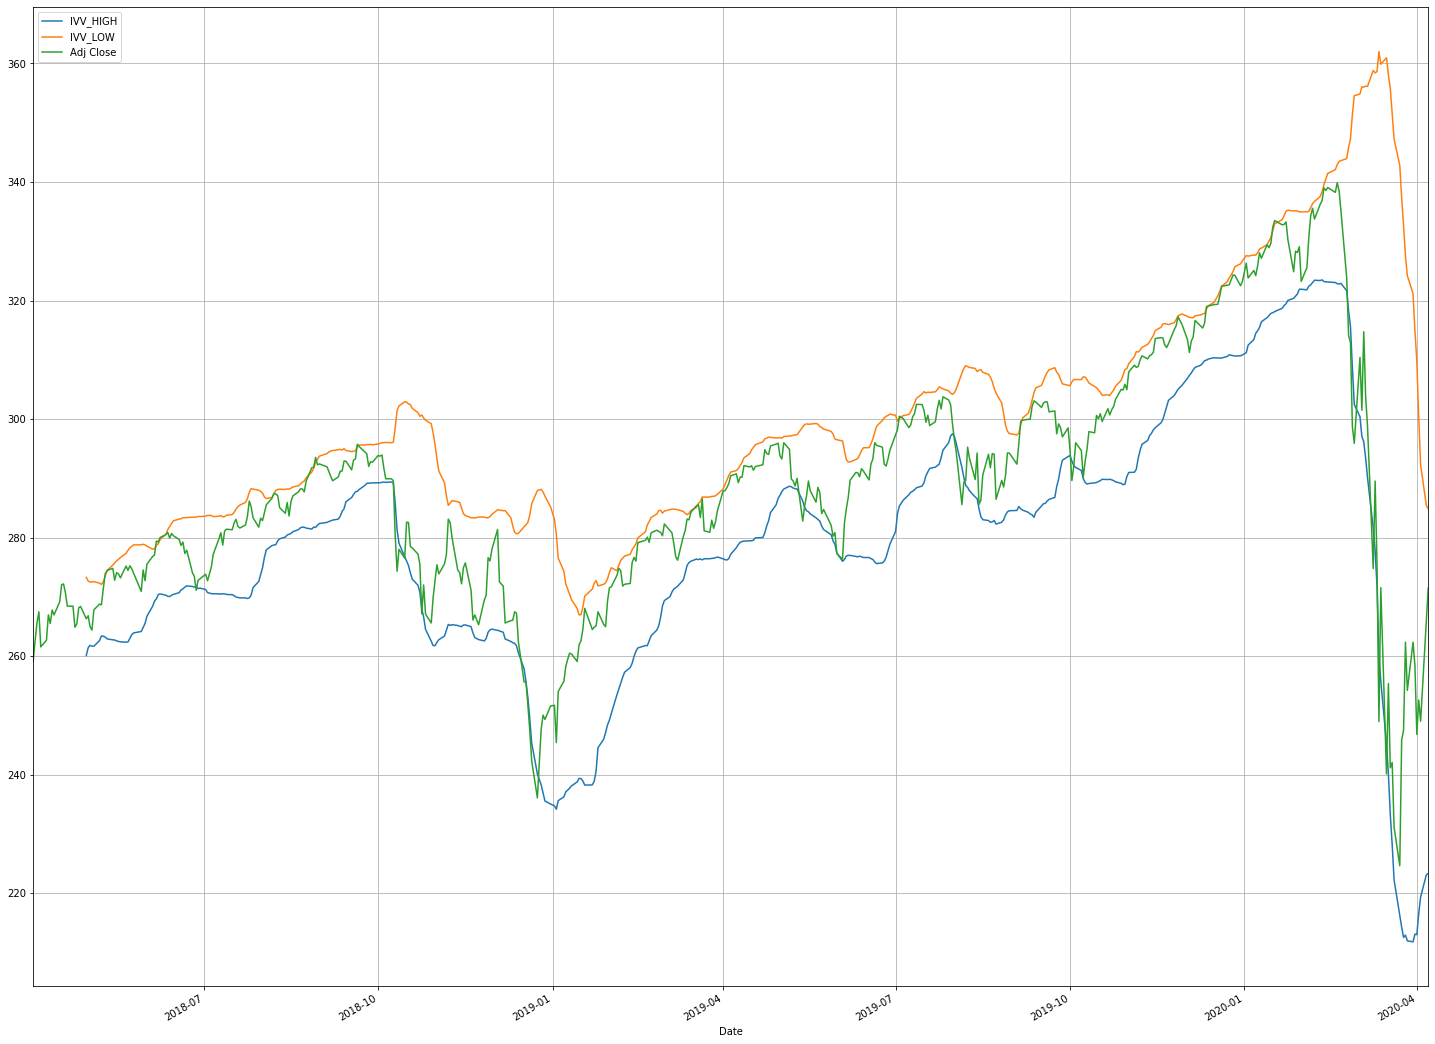

In [57]:
#Exemple de graphique
df = pd.DataFrame()
mycolumn=['IVV_HIGH','IVV_LOW']
df[mycolumn]= result_BB[mycolumn]
df['Adj Close'] = Data['IVV']['Close']
df.plot(grid=True, figsize = (25,20))

### 2 - Signal

#### Bollinger Bands

Pour Bollinger Bands si close price est supérieure à +2SD -> Long
                     ; si close price est inférieure à -2SD -> Short
                     ; sinon Neutral

In [58]:
Signal_BBAND = Data
for ticker in BLack_ETF:
    i = 0
    signal = []
    while i <= len(df.index)-1: 
        haut_BB = result_BB[ticker+'_HIGH'][i]
        bas_BB = result_BB[ticker+'_LOW'][i]
        haut_stock = Data[ticker]['High'][i]
        bas_stock = Data[ticker]['Low'][i]
        if haut_stock > haut_BB:
            Sig = 1
        elif bas_stock < bas_BB:
            Sig = -1
        else:
            Sig = 0
        signal.append(Sig)
        i=i+1
    S = pd.Series(signal, name = 'Signal_BBAND', index = df.index)
    S2D = pd.DataFrame(columns = pd.MultiIndex.from_tuples([(ticker, 'Signal_BBAND')]))
    S2D[ticker] = S
    Signal_BBAND = Signal_BBAND.join(S2D)

#### Oscillateur stochastique

Pour Oscillateur stochastique si Stok =< 20 -> Long
                              ;si Stok >= 80 -> Short
                              ;sinon Neutral

In [59]:
Signal_STOK = Data
for ticker in BLack_ETF:
    i = 0
    signal = []
    while i <= len(df.index)-1: 
        stok = result_STOK[ticker][i]
        if stok <= 0.20:
            Sig = 1
        elif stok >= 0.80:
            Sig = -1
        else:
            Sig = 0
        signal.append(Sig)
        i=i+1
    S = pd.Series(signal, name = 'Signal_STOK', index = df.index)
    S2D = pd.DataFrame(columns = pd.MultiIndex.from_tuples([(ticker, 'Signal_STOK')]))
    S2D[ticker] = S
    Signal_STOK = Signal_STOK.join(S2D)

#### MACD

Pour MACD si MACDdiff > 0 -> Long
          ;si MACDdiff < 0 -> Short
          ;si MACDdiff = 0 -> Neutral

In [60]:
Signal_MACD = Data
for ticker in BLack_ETF:
    i = 0
    signal = []
    while i <= len(df.index)-1:
        MACD = result_MACD[ticker+'_DIFF'][i] 
        if MACD > 0:
            Sig = 1
        elif MACD == 0:
            Sig = 0
        else:
            Sig = -1
        signal.append(Sig)
        i=i+1
    S = pd.Series(signal, name = 'Signal_MACD', index = df.index)
    S2D = pd.DataFrame(columns = pd.MultiIndex.from_tuples([(ticker, 'Signal_MACD')]))
    S2D[ticker] = S
    Signal_MACD = Signal_MACD.join(S2D)

#### RSI

Pour RSI si RSI =< 30 -> Long 
         ;si RSI >= 70 -> Short
         ;sinon neutral

In [61]:
Signal_RSI = Data
for ticker in BLack_ETF:   
    df = RSI(Data[ticker],14)
    i = 0
    signal = []
    while i <= len(df.index)-1: 
        if df.iloc[i,-1] >= 70:
            Sig = -1
        elif df.iloc[i,-1] <= 30:
            Sig = 1
        else:
            Sig = 0
        signal.append(Sig)
        i=i+1
    S = pd.Series(signal, name = 'Signal_RSI', index = df.index)
    S2D = pd.DataFrame(columns = pd.MultiIndex.from_tuples([(ticker, 'Signal_RSI')]))
    S2D[ticker] = S
    Signal_RSI = Signal_RSI.join(S2D)

#### Money Flow Index

Pour Money Flow ;si MFI < 30 -> Long
                :si MFI > 70 -> Short
                :sinon neutral

In [62]:
Signal_MFI = Data
for ticker in BLack_ETF:   
    df = MFI(Data[ticker],14)
    i = 0
    signal = []
    while i <= len(df.index)-1: 
        if df.iloc[i,-1] >= 70:
            Sig = -1
        elif df.iloc[i,-1] <= 30:
            Sig = 1
        else:
            Sig = 0
        signal.append(Sig)
        i=i+1
    S = pd.Series(signal, name = 'Signal_MFI', index = df.index)
    S2D = pd.DataFrame(columns = pd.MultiIndex.from_tuples([(ticker, 'Signal_MFI')]))
    S2D[ticker] = S
    Signal_MFI = Signal_MFI.join(S2D)

In [63]:
# Mettre ensemble tous les tableaux
debut = len(BLack_ETF)*6
fin = debut + len(BLack_ETF)
Signal_5indicateurs = Signal_BBAND.iloc[:,debut:fin]
Signal_5indicateurs = Signal_5indicateurs.join(Signal_MACD.iloc[:,debut:fin])
Signal_5indicateurs = Signal_5indicateurs.join(Signal_RSI.iloc[:, debut:fin])
Signal_5indicateurs = Signal_5indicateurs.join(Signal_MFI.iloc[:, debut:fin])
Signal_5indicateurs = Signal_5indicateurs.join(Signal_STOK.iloc[:, debut:fin])

In [64]:
Signal_BBAND

IJH                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2018-04-02  187.070007  187.490005  181.690002  183.169998  176.987183   
2018-04-03  184.279999  186.330002  183.360001  185.699997  179.431747   
2018-04-04  183.339996  187.639999  182.910004  187.339996  181.016418   
2018-04-05  188.339996  189.229996  187.509995  188.759995  182.388504   
2018-04-06  187.559998  188.529999  183.589996  185.009995  178.765060   
...                ...         ...         ...         ...         ...   
2020-04-01  137.130005  139.020004  134.300003  135.429993  135.429993   
2020-04-02  134.860001  140.190002  133.460007  136.880005  136.880005   
2020-04-03  136.059998  137.639999  131.779999  133.179993  133.179993   
2020-04-06  138.949997  144.449997  138.830002  143.899994  143.899994   
2020-04-07  149.300003  152.574707  148.367996  149.470001  149.470001   

                            IWM                                      ...  \
             Volume        Open        High         Low       Close  ...   
Date                                                                 ...   
2018-04-02  1927200  151.520004  152.070007  147.179993  148.130005  ...   
2018-04-03  2205000  149.020004  150.600006  148.300003  150.250000  ...   
2018-04-04  1263200  148.500000  152.580002  148.270004  152.160004  ...   
2018-04-05   817600  153.039993  153.610001  152.320007  153.419998  ...   
2018-04-06  1874300  152.369995  153.399994  149.149994  150.360001  ...   
...             ...         ...         ...         ...         ...  ...   
2020-04-01  2939600  108.699997  110.379997  105.529999  106.660004  ...   
2020-04-02  3910900  105.720001  110.389999  104.570000  107.669998  ...   
2020-04-03  3525000  106.589996  108.000000  102.599998  104.620003  ...   
2020-04-06  3550500  109.089996  113.339996  109.019997  112.629997  ...   
2020-04-07   707357  109.089996  118.639999  115.025002  115.519997  ...   

                   IVW                                           IVV  \
                   Low       Close   Adj Close   Volume Signal_BBAND   
Date                                                                   
2018-04-02  149.750000  151.320007  146.936676  1968400            0   
2018-04-03  150.850006  153.169998  148.733047  2403100            0   
2018-04-04  150.240005  155.110001  150.616867  1559500            0   
2018-04-05  155.210007  156.080002  151.558777   742300            0   
2018-04-06  151.440002  152.380005  147.965958  1439200            0   
...                ...         ...         ...      ...          ...   
2020-04-01  156.509995  158.000000  158.000000  1504500            1   
2020-04-02  156.750000  161.360001  161.360001  1111100            1   
2020-04-03  157.039993  159.020004  159.020004   889500            1   
2020-04-06  164.479996  170.630005  170.630005  1179400            1   
2020-04-07  172.649994  173.289993  173.289993   398661            1   

                    IWF          IJH          IJR          IWM          IVW  
           Signal_BBAND Signal_BBAND Signal_BBAND Signal_BBAND Signal_BBAND  
Date                                                                         
2018-04-02            0            0            0            0            0  
2018-04-03            0            0            0            0            0  
2018-04-04            0            0            0            0            0  
2018-04-05            0            0            0            0            0  
2018-04-06            0            0            0            0            0  
...                 ...          ...          ...          ...          ...  
2020-04-01            1            1            1            1            1  
2020-04-02            1            1            1            1            1  
2020-04-03            1            1            1 

Performance

In [65]:
import numpy as np
NbrJour = 1
rendement=0
rendement_ETF=0
rendement_tot = []
rendement_signal = pd.DataFrame()
sig = ['Signal_MFI','Signal_RSI','Signal_BBAND','Signal_STOK','Signal_MACD']
for signal in sig:  
    for ticker in BLack_ETF:
        for i in range(len(Data)-1):
            Signal = Signal_5indicateurs[ticker][signal][i]
            ouverture = Data[ticker]['Open'][i+1]
            fermeture = Data[ticker]['Close'][i+1]
            if Signal==1:
                rendement = (-ouverture + fermeture)/ouverture*100
            elif Signal==-1:
                rendement = (ouverture - fermeture)/fermeture*100
            rendement_ETF += rendement
            rendement=0
        rendement_tot.append(rendement_ETF)
        rendement_ETF=0
    rendement_signal[signal+'_%'] = np.transpose(rendement_tot)
    rendement_tot=[]

In [66]:
rendement_signal.index=BLack_ETF
rendement_signal
rendement_signal_moy = rendement_signal.mean()
rendement_signal_moy

Signal_MFI_%      3.990767
Signal_RSI_%      4.073342
Signal_BBAND_%   -2.064950
Signal_STOK_%     4.268916
Signal_MACD_%     5.880706
dtype: float64

b.	Vous fournissez les statistiques sur la performance de la classification

In [67]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_curve

1) Generic Accuracy

In [68]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
accuracy = []
confusion =[]
precision = pd.DataFrame()
for signal in sig:  
    for ticker in BLack_ETF:
        y_true = rendement_bin[ticker]
        y_pred = Signal_5indicateurs[ticker][signal]
        precision = pd.DataFrame(y_true,y_pred)
        print(precision)
        precision[(precision!=0).all(1)]
        print(precision)
        accuracy.append(accuracy_score(y_true, y_pred))
        confusion.append(confusion_matrix(y_true, y_pred))

            IVV
Signal_MFI     
-1          NaN
-1          NaN
-1          NaN
-1          NaN
-1          NaN
...         ...
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN

[509 rows x 1 columns]
            IVV
Signal_MFI     
-1          NaN
-1          NaN
-1          NaN
-1          NaN
-1          NaN
...         ...
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN

[509 rows x 1 columns]
            IWF
Signal_MFI     
-1          NaN
-1          NaN
-1          NaN
-1          NaN
-1          NaN
...         ...
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN

[509 rows x 1 columns]
            IWF
Signal_MFI     
-1          NaN
-1          NaN
-1          NaN
-1          NaN
-1          NaN
...         ...
 0          NaN
 0          NaN
 0          NaN
 0          NaN
 0          NaN

[509 rows x 1 columns]
            IJH
Signal_MFI     
-1          NaN
-1          NaN
-1      

[509 rows x 1 columns]
             IJH
Signal_STOK     
 0           NaN
 0           NaN
-1           NaN
 0           NaN
 0           NaN
...          ...
 0           NaN
 0           NaN
 0           NaN
-1           NaN
 0           NaN

[509 rows x 1 columns]
             IJH
Signal_STOK     
 0           NaN
 0           NaN
-1           NaN
 0           NaN
 0           NaN
...          ...
 0           NaN
 0           NaN
 0           NaN
-1           NaN
 0           NaN

[509 rows x 1 columns]
             IJR
Signal_STOK     
 0           NaN
-1           NaN
-1           NaN
-1           NaN
 0           NaN
...          ...
 0           NaN
 0           NaN
 0           NaN
-1           NaN
 1           NaN

[509 rows x 1 columns]
             IJR
Signal_STOK     
 0           NaN
-1           NaN
-1           NaN
-1           NaN
 0           NaN
...          ...
 0           NaN
 0           NaN
 0           NaN
-1           NaN
 1           NaN

[509 rows x 1 column

2) Matrice de confusion

In [69]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
confusion =[]
for signal in sig:  
    for ticker in BLack_ETF:
        y_true = rendement_bin[ticker]
        y_pred = Signal_5indicateurs[ticker][signal]
        confusion.append(confusion_matrix(y_true, y_pred))
#mat = confusion_matrix(y_true, y_pred)
#mat

In [70]:
confusion

[array([[  0,   0,   0],
        [ 24, 179,  24],
        [ 44, 221,  17]], dtype=int64), array([[  0,   0,   0],
        [ 25, 173,  22],
        [ 61, 215,  13]], dtype=int64), array([[  0,   0,   0],
        [ 23, 193,  17],
        [ 55, 210,  11]], dtype=int64), array([[  0,   0,   0],
        [ 25, 197,  20],
        [ 48, 208,  11]], dtype=int64), array([[  0,   0,   0],
        [ 18, 189,  25],
        [ 57, 209,  11]], dtype=int64), array([[  0,   0,   0],
        [ 26, 159,  30],
        [ 58, 213,  23]], dtype=int64), array([[  0,   0,   0],
        [  5, 206,  16],
        [ 31, 250,   1]], dtype=int64), array([[  0,   0,   0],
        [ 16, 193,  11],
        [ 48, 240,   1]], dtype=int64), array([[  0,   0,   0],
        [  4, 201,  28],
        [ 16, 256,   4]], dtype=int64), array([[  0,   0,   0],
        [  6, 204,  32],
        [ 25, 234,   8]], dtype=int64), array([[  0,   0,   0],
        [  5, 197,  30],
        [ 35, 235,   7]], dtype=int64), array([[  0,   0,   

3) ROC Curve

In [71]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
fpr, tpr, _ = roc_curve(y_true, y_pred)
allo = auc(fpr, tpr)


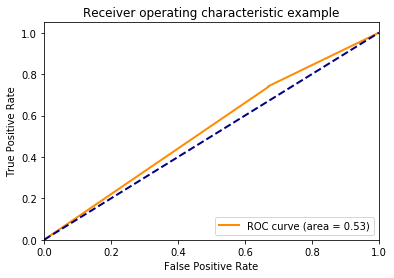

In [72]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % allo)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [73]:
Signal_5indicateurs

,IVV,IWF,IJH,IJR,IWM,IVW,IVV,IWF,IJH,IJR,...,IJH,IJR,IWM,IVW,IVV,IWF,IJH,IJR,IWM,IVW
,Signal_BBAND,Signal_BBAND,Signal_BBAND,Signal_BBAND,Signal_BBAND,Signal_BBAND,Signal_MACD,Signal_MACD,Signal_MACD,Signal_MACD,...,Signal_MFI,Signal_MFI,Signal_MFI,Signal_MFI,Signal_STOK,Signal_STOK,Signal_STOK,Signal_STOK,Signal_STOK,Signal_STOK
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-02,0,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,0,0,0,0,1,0
2018-04-03,0,0,0,0,0,0,1,1,1,1,...,-1,-1,-1,-1,-1,-1,0,-1,-1,-1
2018-04-04,0,0,0,0,0,0,1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2018-04-05,0,0,0,0,0,0,1,1,1,1,...,-1,-1,-1,-1,0,0,0,-1,-1,0
2018-04-06,0,0,0,0,0,0,1,1,1,1,...,-1,-1,-1,-1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01,1,1,1,1,1,1,-1,-1,-1,-1,...,0,0,0,-1,0,0,0,0,0,0
2020-04-02,1,1,1,1,1,1,-1,-1,-1,-1,...,0,0,0,0,-1,-1,0,0,0,-1


In [74]:
df_describe

,count,mean,std,min,25%,50%,75%,max
IVV,509.0,281.208387,22.123596,223.251190,265.032959,279.278320,294.405670,337.763702
IWF,509.0,152.160487,13.989533,120.064903,142.042297,151.035172,159.796677,191.721085
IJH,509.0,186.918291,13.598649,121.026871,182.388504,188.940781,193.921326,209.329269
IJR,509.0,77.505218,6.435644,48.878159,75.302055,77.749359,81.885315,87.845085
IWM,509.0,152.523060,12.015850,99.515213,148.483185,153.537140,161.344666,169.051758
IVW,509.0,170.756128,13.949069,137.721390,159.941406,170.345078,179.304886,209.909103


In [75]:
#X = np.array(Data.drop(columns='Adj Close'))
df_model = pd.DataFrame(Data)
df_model

IJH                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2018-04-02  187.070007  187.490005  181.690002  183.169998  176.987183   
2018-04-03  184.279999  186.330002  183.360001  185.699997  179.431747   
2018-04-04  183.339996  187.639999  182.910004  187.339996  181.016418   
2018-04-05  188.339996  189.229996  187.509995  188.759995  182.388504   
2018-04-06  187.559998  188.529999  183.589996  185.009995  178.765060   
...                ...         ...         ...         ...         ...   
2020-04-01  137.130005  139.020004  134.300003  135.429993  135.429993   
2020-04-02  134.860001  140.190002  133.460007  136.880005  136.880005   
2020-04-03  136.059998  137.639999  131.779999  133.179993  133.179993   
2020-04-06  138.949997  144.449997  138.830002  143.899994  143.899994   
2020-04-07  149.300003  152.574707  148.367996  149.470001  149.470001   

                            IWM                                      ...  \
             Volume        Open        High         Low       Close  ...   
Date                                                                 ...   
2018-04-02  1927200  151.520004  152.070007  147.179993  148.130005  ...   
2018-04-03  2205000  149.020004  150.600006  148.300003  150.250000  ...   
2018-04-04  1263200  148.500000  152.580002  148.270004  152.160004  ...   
2018-04-05   817600  153.039993  153.610001  152.320007  153.419998  ...   
2018-04-06  1874300  152.369995  153.399994  149.149994  150.360001  ...   
...             ...         ...         ...         ...         ...  ...   
2020-04-01  2939600  108.699997  110.379997  105.529999  106.660004  ...   
2020-04-02  3910900  105.720001  110.389999  104.570000  107.669998  ...   
2020-04-03  3525000  106.589996  108.000000  102.599998  104.620003  ...   
2020-04-06  3550500  109.089996  113.339996  109.019997  112.629997  ...   
2020-04-07   707357  109.089996  118.639999  115.025002  115.519997  ...   

                   IWF                                          IVW  \
                   Low       Close   Adj Close   Volume        Open   
Date                                                                  
2018-04-02  131.509995  132.800003  129.831482  2531900  154.369995   
2018-04-03  132.410004  134.339996  131.337021  1946800  152.369995   
2018-04-04  131.809998  136.130005  133.087051  1966700  150.559998   
2018-04-05  136.259995  137.080002  134.015823  1168000  156.339996   
2018-04-06  133.080002  133.940002  130.945984  2229700  154.710007   
...                ...         ...         ...      ...         ...   
2020-04-01  142.889999  144.160004  144.160004  2030400  158.839996   
2020-04-02  142.869995  146.860001  146.860001  2562600  156.850006   
2020-04-03  142.929993  144.589996  144.589996  1131600  160.669998   
2020-04-06  149.470001  155.130005  155.130005  2469900  164.850006   
2020-04-07  157.107498  157.699997  157.699997   301841  176.289993   

                                                                     
                  High         Low       Close   Adj Close   Volume  
Date                                                                 
2018-04-02  154.910004  149.750000  151.320007  146.936676  1968400  
2018-04-03  153.589996  150.850006  153.169998  148.733047  2403100  
2018-04-04  155.500000  150.240005  155.110001  150.616867  1559500  
2018-04-05  156.869995  155.210007  156.080002  151.558777   742300  
2018-04-06  155.789993  151.440002  152.380005  147.965958  1439200  
...                ...         ...         ...         ...      ...  
2020-04-01  161.600006  156.509995  158.000000  158.000000  1504500  
2020-04-02  161.460007  156.750000  161.360001  161.360001  1111100  
2020-04-03  161.839996  157.039993  159.020004  159.020004   889500  
2020-04-06  171.550003  164.479996  170.630005  170.630005  1179400  
2020-04-07  

Separation de l'echntillon - 70% echantillon d'entrainement et 30%  echantillon de test

# Model Logit

In [373]:
#df_model.columns
X = np.array(Signal_5indicateurs["IWM"])
#X = df_model["IWM"].drop(columns='Adj Close')
#X.astype(int)

In [374]:
#o	Vous calculez la performance de votre stratégie en utilisant le ‘’Adj Close’’.
#Y= df_model["IWM"]['Adj Close']
Y= rendement_bin["IWM"]
#Y.astype(int)

In [375]:
from sklearn.model_selection import train_test_split
def calculModelLogit(X,Y):
    trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.30, random_state = 42)
    ModeleLogit = LogisticRegression()
    TrainFit = ModeleLogit.fit(trainX, trainY)
    
    TrainScores = ModeleLogit.score(trainX, trainY)
    print('Train score=',TrainScores)
    
    TestsScore = ModeleLogit.score(testX, testY)
    print('Test score=',TestsScore)
    
    predictions = ModeleLogit.predict(testX)
    
    resid = testY - predictions
    sse = sum(resid**2)
    k=trainX.shape[1] 
    AIC= 2*k - 2*np.log(sse)
    print('AIC=',AIC)
    
    return predictions, TrainScores, TestsScore, AIC, ModeleLogit.coef_, testY, ModeleLogit

In [376]:
def getROC(yTest, prediction):
    fpr, tpr, _ = roc_curve(yTest, prediction)
    allo = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % allo)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [377]:
def getMC(yTest, prediction):
    matrice = confusion_matrix(yTest, prediction)
    print(matrice)
    

In [378]:
def verificationCoef(coef, data):
    dataAmeliorer = data
    for i in range(0,len(coef)):
        if coef[i] < -0.5:
            sigle = data.columns[i]
#print(sigle)
            if sigle in dataAmeliorer.columns:
                dataAmeliorer = dataAmeliorer.drop(sigle, axis="columns")
    return dataAmeliorer
    

In [379]:
predictions, TrainScores, TestsScore, AIC, coefficientModel, testY, model = calculModelLogit(X, Y)

Train score= 0.7162921348314607
Test score= 0.6928104575163399
AIC= 2.299704796579883


C:\Users\15144\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


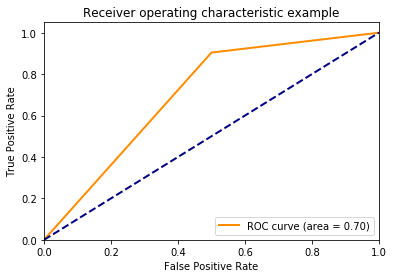

In [380]:
getROC(testY, predictions)

In [381]:
getMC(testY, predictions)

[[40 40]
 [ 7 66]]


In [382]:
MoyenneCoefficient = coefficient.mean(axis = 0)

In [383]:
nouveauData = verificationCoef(MoyenneCoefficient, Signal_5indicateurs["IWM"])

In [384]:
nouveauData

,Signal_BBAND,Signal_MACD
Date,,
2018-04-02,0,0
2018-04-03,0,1
2018-04-04,0,1
2018-04-05,0,1
2018-04-06,0,1
...,...,...
2020-04-01,1,-1
2020-04-02,1,-1
2020-04-03,1,-1


In [385]:
X = np.array(nouveauData)
nouvellePredictions, nouveauTrainScores, nouveauTestsScore, nouveauAIC, nouveauCoefficientModel, nouveauTestY, nouveauModel = calculModelLogit(X, Y)

Train score= 0.5814606741573034
Test score= 0.5490196078431373
AIC= -4.468213009194519


C:\Users\15144\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


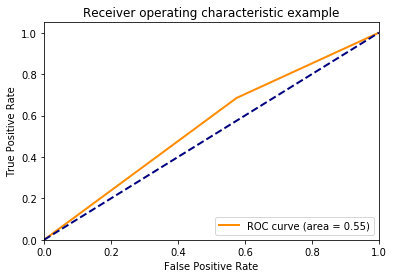

In [386]:
getROC(nouveauTestY, nouvellePredictions)

In [387]:
getMC(nouveauTestY, nouvellePredictions)

[[34 46]
 [23 50]]


On veut utiliser l'elimination recursive !

In [388]:
from sklearn.feature_selection import RFE

In [389]:
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
X = np.array(Signal_5indicateurs["IWM"])
Y = rendement_bin["IWM"]
rfe = RFE(model, 20)
rfe = rfe.fit(X, Y)
print(rfe.support_)
print(rfe.ranking_)
rapport = rfe.support_

nouvelleDB=Signal_5indicateurs["IWM"]
## On veut visualiser les variables qui ne sont pas sélectionnées
for i in range(0,len(rapport)):
    if rapport[i]==False :
        sigle = Signal_5indicateurs["IWM"]
        print("Le paramètre:",feature_list[i], "n'est pas selectionné")
        nouvelleDB = nouvelleDB.drop(sigle, axis="columns")

[ True  True  True  True  True]
[1 1 1 1 1]


C:\Users\15144\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


On voit que rien n'a été enlever

3.	Présentez le modèle sélectionné. 

On va utiliser ce model: 

In [418]:
nouveauData

,Signal_BBAND,Signal_MACD
Date,,
2018-04-02,0,0
2018-04-03,0,1
2018-04-04,0,1
2018-04-05,0,1
2018-04-06,0,1
...,...,...
2020-04-01,1,-1
2020-04-02,1,-1
2020-04-03,1,-1


Évaluez la capacité de classification.

# --------------------------------------------------------------------------------------------------------------

# Arbre de decision

In [429]:
from sklearn.tree import DecisionTreeClassifier

In [430]:
X = np.array(Signal_5indicateurs["IWM"])
Y= rendement_bin["IWM"]

In [431]:
def calculModelArbreDecision(X,Y):
    trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.30, random_state = 42)
    ModeleArbre = DecisionTreeClassifier()
    
    TrainFit = ModeleArbre.fit(trainX, trainY)
    
    TrainScores = ModeleArbre.score(trainX, trainY)
    print('Train score=',TrainScores)
    
    TestsScore = ModeleArbre.score(testX, testY)
    print('Test score=',TestsScore)
    
    predictions = ModeleArbre.predict(testX)
    
    resid = testY - predictions
    sse = sum(resid**2)
    k=trainX.shape[1] 
    AIC= 2*k - 2*np.log(sse)
    print('AIC=',AIC)
    
    return predictions, TrainScores, TestsScore, AIC, testY, testX

In [432]:
predictions, TrainScores, TestsScore, AIC, testY, testX = calculModelArbreDecision(X, Y)

Train score= 0.7415730337078652
Test score= 0.7058823529411765
AIC= 2.3866750204593608


Pour l'echantillon test

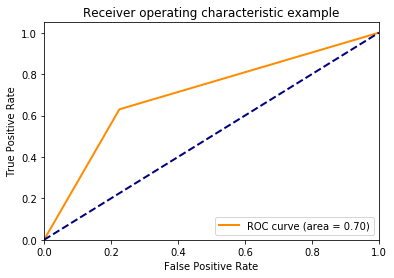

In [433]:
getROC(testY, predictions)

In [434]:
getMC(testY, predictions)

[[62 18]
 [27 46]]


Répétez l’exercices avec les variables sélectionnées par le modèle Logit

In [435]:
X = nouveauData

In [436]:
nouvellePredictions, nouveauTrainScores, nouveauTestsScore, nouveauAIC, nouveautestY, nouveautestX = calculModelArbreDecision(X, Y)

Train score= 0.5814606741573034
Test score= 0.5490196078431373
AIC= -4.468213009194519


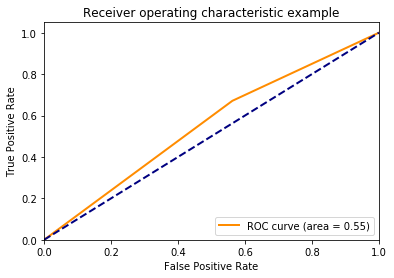

In [437]:
getROC(nouveautestY, nouvellePredictions)

In [438]:
getMC(nouveautestY, nouvellePredictions)

[[35 45]
 [24 49]]


Notez les principales différences et similitudes et expliquez les divergences.

# Random Forest 

In [456]:
from sklearn.ensemble import RandomForestClassifier

In [457]:
X = np.array(Signal_5indicateurs["IWM"])
Y= rendement_bin["IWM"]

In [458]:
def calculModelRandomForest(X,Y):
    trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.30, random_state = 42)
    ModeleRF = RandomForestClassifier()
    
    TrainFit = ModeleRF.fit(trainX, trainY)
    
    TrainScores = ModeleRF.score(trainX, trainY)
    print('Train score=',TrainScores)
    
    TestsScore = ModeleRF.score(testX, testY)
    print('Test score=',TestsScore)
    
    predictions = ModeleRF.predict(testX)
    
    resid = testY - predictions
    sse = sum(resid**2)
    k=trainX.shape[1] 
    AIC= 2*k - 2*np.log(sse)
    print('AIC=',AIC)
    variableImportante = ModeleRF.feature_importances_
    return predictions, TrainScores, TestsScore, AIC, testY, variableImportante

In [459]:
predictions, TrainScores, TestsScore, AIC, testY, variableImportante = calculModelRandomForest(X, Y)

Train score= 0.7415730337078652
Test score= 0.7058823529411765
AIC= 2.3866750204593608


C:\Users\15144\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


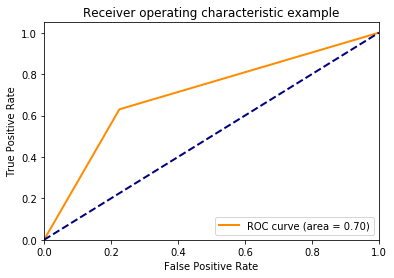

In [460]:
getROC(testY, predictions)

In [461]:
getMC(testY, predictions)

[[62 18]
 [27 46]]


Identifiez les variables les plus importantes (‘’Variable Importance’’)

In [462]:
variableImportante

array([0.02612796, 0.01834081, 0.16987859, 0.10969134, 0.6759613 ])

Comparez les variables sélectionnées par Random Forest au modèle Logit.

1) Quelles sont les variables d’importance similaires.

2) Quelles sont les variables différentes

3) Pourquoi les variables sélectionnées ne sont pas totalement similaires?

# Répétez l’exercices pour des méthodes plus flexibles mais opaques.

# Comparer une dernière fois, l’ensemble des modèles, sélectionnez-en un et expliquez votre choix.

# Répétez l’exercice mais cette fois-ci pour chaque ETF pris individuellement.